# Variational Principle  using Symbolic Mathematics in Python 

## 1. Introduction

The variational principle tells us that we can use a trial wavefunction to solve the Schrodinger equation using the following theorem:

$${{\int {{\Psi ^*}\hat H{\rm{ }}\Psi } d\tau } \over {\int {{\Psi ^*}\Psi } d\tau }} \ge {E_0}$$

We will use Sympy to solve the particle in a box problem by guessing a trial wavefunction using variational principle

In [1]:
import sympy as sym

This exercise is a bit more self-guided than the other notebooks we have done. One of the most useful things you can do is **open last week's notebook to remember the commands in sympy**. Also, remember that google is your friend:

1. [Sympy tutorial](https://docs.sympy.org/latest/tutorial/index.html)
2. [Stack Overflow](https://stackoverflow.com/search?q=sympy+)
3. [Stack Exchange](https://stackexchange.com/)

## 2. Particle in a box

The wave function that we pick for a particle in a box needs to have the following properties

1. single valued
1. normalizable
1. function and its first derivative are continuous 
1. boundary condition that the wave function goes to zero at the ends of the box

![Particle in a box](InfiniteSquareWellAnimation.gif)

Particle in a box: a is a classical particle, red is real part, blue is imaginary part.

This particle only expericnes kinetic energy between the box, so the Hamiltonian for this system is

$$\hat H = {{ - {\hbar ^2}} \over {2m}}{{{d^2}} \over {d{x^2}}} + \left\{ {\matrix{{V(x) = 0} & {0 < x < a}  \cr {V(x) = \infty } & {x < 0\text{ }{\rm{ or}}\;x > a}  \cr } } \right.$$

For our purposes, that means we can consider the Hamiltonian to be 

$$\hat H = {{ - {\hbar ^2}} \over {2m}}{{{d^2}} \over {d{x^2}}}$$

as long as we keep the limits of integration to be $(0,a)$

### 2.1 Trial Wave function

Although the particle in box has a well known solution

[https://en.wikipedia.org/wiki/Particle_in_a_box](https://en.wikipedia.org/wiki/Particle_in_a_box)

(or check your favorite pchem book)

We are going to guess a trial wave function:

$$\Phi (x) = \left( {{x \over a} - {{{x^3}} \over a^3}} \right) + \alpha \left( {{{{x^5}} \over {{a^5}}} - {1 \over 2}\left( {{{{x^7}} \over {{a^7}}} + {{{x^9}} \over {{a^9}}}} \right)} \right)$$

### 2.2 Exercise: Variational Theorem

We are going to follow the following plan:

1. Solve for the energy of the trial wave function above  

$${E_{trial}} = {{\int\limits_0^a {\Phi (x){{ - {\hbar ^2}} \over {2m}}{{{d^2}} \over {d{x^2}}}\Phi (x)dx} } \over {\int\limits_0^a {\Phi {{(x)}^2}dx} }}$$

Your answer will be a function of $ m,a,\text{and } \alpha$ We will use $\alpha$ as the parameter we vary to minimize the energy and make a new trial wave function.

2. Minimize the trial energy 
We will use a first derivative of the trial energy $${d \over {d\alpha }}{E_{trial}}(\alpha )$$ to find the value of $\alpha$ that gives you the lowest energy


3. Plot your new wavefunction compared to the ground state particle in a box: $${\psi _{true}}(x) = {\left( {{2 \over a}} \right)^{1/2}}\sin {{n\pi x} \over a}$$ Plot as a function of $x/a$ from $0$ to $1$. Assuming this has $m=m_e$, and $a=a_0$ use atomic (theorist) units to plot the function.

4. Compare your trial energy to the actual energy (using atomic units)
$${E_{true}}(n = 1) = {{{\hbar ^2}{\pi ^2}} \over {2m{a^2}}}$$


In [42]:
# Your code here
# h bar in atomic units is equal to 1
from sympy import *
m,a,x,alpha = sym.symbols('m,a_0,x,alpha')

In [43]:
phi = ((x/a)-(x**3/a**3)) + alpha*((x**5/a**5)-((1/2)*((x**7/a**7)+(x**9/a**9))))
phi

alpha*(x**5/a_0**5 - 0.5*x**7/a_0**7 - 0.5*x**9/a_0**9) + x/a_0 - x**3/a_0**3

In [45]:
doublediff=sym.diff((phi),x,x)
doublediff

-x*(6 + alpha*x**2*(-20 + 21.0*x**2/a_0**2 + 36.0*x**4/a_0**4)/a_0**2)/a_0**3

In [46]:
numerator=phi*sym.Rational(-1/2)*(doublediff)
numerator

-x*(6 + alpha*x**2*(-20 + 21.0*x**2/a_0**2 + 36.0*x**4/a_0**4)/a_0**2)*(-alpha*(x**5/a_0**5 - 0.5*x**7/a_0**7 - 0.5*x**9/a_0**9)/2 - x/(2*a_0) + x**3/(2*a_0**3))/a_0**3

In [47]:
denominator= (phi*phi)
denominator

(alpha*(x**5/a_0**5 - 0.5*x**7/a_0**7 - 0.5*x**9/a_0**9) + x/a_0 - x**3/a_0**3)**2

In [48]:
top=(sym.integrate((numerator), (x,0,a)))
top

-0.114027149321267*alpha**2/a_0 + 3.35714285714286*alpha/a_0 + 0.2*(-10.0*alpha - 3.0)/a_0 + 0.111111111111111*(-10.0*alpha**2 + 6.0*alpha)/a_0 + 0.0909090909090909*(15.5*alpha**2 - 19.5*alpha)/a_0 + 1.0/a_0

In [49]:
bottom=(sym.integrate((denominator), (x,0,a)))
bottom

0.0834787503518154*a_0*alpha**2 - 0.333333333333333*a_0*alpha + 0.142857142857143*a_0*(2.0*alpha + 1.0) + 0.0769230769230769*a_0*(-1.0*alpha**2 + 1.0*alpha) - 0.0666666666666667*a_0

In [50]:
top/bottom

(-0.114027149321267*alpha**2/a_0 + 3.35714285714286*alpha/a_0 + 0.2*(-10.0*alpha - 3.0)/a_0 + 0.111111111111111*(-10.0*alpha**2 + 6.0*alpha)/a_0 + 0.0909090909090909*(15.5*alpha**2 - 19.5*alpha)/a_0 + 1.0/a_0)/(0.0834787503518154*a_0*alpha**2 - 0.333333333333333*a_0*alpha + 0.142857142857143*a_0*(2.0*alpha + 1.0) + 0.0769230769230769*a_0*(-1.0*alpha**2 + 1.0*alpha) - 0.0666666666666667*a_0)

In [51]:
function=(top/bottom).subs(a,1)
function

(0.183952648658531*alpha**2 + 0.251082251082251*alpha + 0.4)/(0.00655567342873843*alpha**2 + 0.0293040293040293*alpha + 0.0761904761904761)

In [52]:
solveset(sym.diff(function,alpha))

{-5.7405696334359, -0.344647139378354}

In [56]:
alpha1=-5.7405696334359
a1=function.subs(alpha,alpha1)
a1

40.4873729589683

In [57]:
alpha2=-0.344647139378354
a2=function.subs(alpha, alpha2)
a2

5.01446575472432

In [58]:
newphi=phi.subs(alpha, alpha2)
newphi

x/a_0 - x**3/a_0**3 - 0.344647139378354*x**5/a_0**5 + 0.172323569689177*x**7/a_0**7 + 0.172323569689177*x**9/a_0**9

In [59]:
newphi2=newphi.subs(a,1)
newphi2

0.172323569689177*x**9 + 0.172323569689177*x**7 - 0.344647139378354*x**5 - x**3 + x

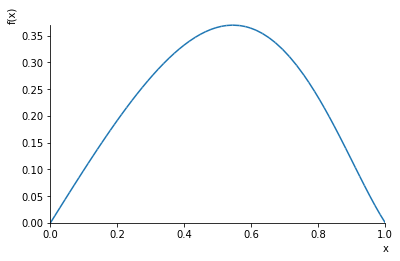

In [60]:
sym.plot(newphi2,(x,0,1))

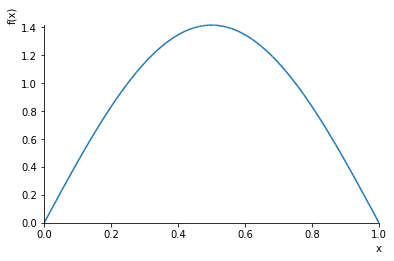

In [61]:
#for the true wavefunction, n and a are 1
sym.plot(sqrt(2)*sin(sym.pi*x),(x,0,1))

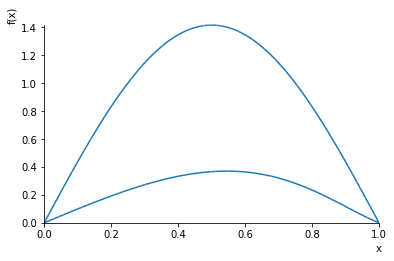

In [62]:
sym.plot(sqrt(2)*sin(sym.pi*x),newphi2, (x,0,1))

In [23]:
Etrue=sym.pi**2/2
Etrue

pi**2/2

Your descriptions/explanations here

### 2.3 Exercise: New trial wavefunction

Determine the minimum energy of the particle in a box using a new trial wavefunction $$x^\alpha(x-a)^\alpha$$

1. Find the minimum energy, $E_{trial}$
2. Plot the new trial wavefunction and compare it to the true solution and the wavefunction you found above
3. Compare you new energy to the trial energy you found above
4. Which wavefunction is better? How do you know?

In [35]:
# plug in 1 for a, after you find the two values for that, find the first derivative of the function from part 1 in terms of alpha, plug them both into Etrial and see which gives you a lower value

In [25]:
from sympy import *
m,a,x,alpha = sym.symbols('m,a_0,x,alpha')

In [26]:
phi2 = x**alpha*(x-a)**alpha
phi2

x**alpha*(-a_0 + x)**alpha

In [27]:
doublediff2=sym.diff((phi2),x,x)
doublediff2

alpha*x**alpha*(-a_0 + x)**alpha*(-2*alpha/(x*(a_0 - x)) + (alpha - 1)/(a_0 - x)**2 + (alpha - 1)/x**2)

In [28]:
numerator2=phi2*sym.Rational(-1/2)*(doublediff2)
numerator2

-alpha*x**(2*alpha)*(-a_0 + x)**(2*alpha)*(-2*alpha/(x*(a_0 - x)) + (alpha - 1)/(a_0 - x)**2 + (alpha - 1)/x**2)/2

In [29]:
denominator2= (phi2*phi2)
denominator2

x**(2*alpha)*(-a_0 + x)**(2*alpha)

In [30]:
top2=(sym.integrate((numerator2), (x,0,a)))
top2

-alpha*Integral(x**(2*alpha)*(-a_0 + x)**(2*alpha)*(a_0**2*alpha - a_0**2 - 4*a_0*alpha*x + 2*a_0*x + 4*alpha*x**2 - 2*x**2)/(x**2*(-a_0 + x)**2), (x, 0, a_0))/2

In [35]:
bottom2=(sym.integrate((denominator2), (x,0,a)))
bottom2

a_0*a_0**(4*alpha)*exp(2*I*pi*alpha)*gamma(2*alpha + 1)*hyper((-2*alpha, 2*alpha + 1), (2*alpha + 2,), 1)/gamma(2*alpha + 2)

In [36]:
top2/bottom2

-a_0**(-4*alpha)*alpha*exp(-2*I*pi*alpha)*gamma(2*alpha + 2)*Integral(x**(2*alpha)*(-a_0 + x)**(2*alpha)*(a_0**2*alpha - a_0**2 - 4*a_0*alpha*x + 2*a_0*x + 4*alpha*x**2 - 2*x**2)/(x**2*(-a_0 + x)**2), (x, 0, a_0))/(2*a_0*gamma(2*alpha + 1)*hyper((-2*alpha, 2*alpha + 1), (2*alpha + 2,), 1))

In [39]:
function1=(top2/bottom2).subs(a,1)
function1

-alpha*exp(-2*I*pi*alpha)*gamma(2*alpha + 2)*Integral(x**(2*alpha)*(x - 1)**(2*alpha)*(4*alpha*x**2 - 4*alpha*x + alpha - 2*x**2 + 2*x - 1)/(x**2*(x - 1)**2), (x, 0, 1))/(2*gamma(2*alpha + 1)*hyper((-2*alpha, 2*alpha + 1), (2*alpha + 2,), 1))

In [40]:
solveset(sym.diff(function1,alpha))

ConditionSet(alpha, Eq((2*alpha*hyper((-2*alpha, 2*alpha + 1), (2*alpha + 2,), 1)*polygamma(0, 2*alpha + 1)*Integral(x**(2*alpha)*(x - 1)**(2*alpha)*(4*alpha*x**2 - 4*alpha*x + alpha - 2*x**2 + 2*x - 1)/(x**2*(x - 1)**2), (x, 0, 1)) - 2*alpha*hyper((-2*alpha, 2*alpha + 1), (2*alpha + 2,), 1)*polygamma(0, 2*alpha + 2)*Integral(x**(2*alpha)*(x - 1)**(2*alpha)*(4*alpha*x**2 - 4*alpha*x + alpha - 2*x**2 + 2*x - 1)/(x**2*(x - 1)**2), (x, 0, 1)) - alpha*hyper((-2*alpha, 2*alpha + 1), (2*alpha + 2,), 1)*Integral(x**(2*alpha)*(x - 1)**(2*alpha)*(4*x**2 - 4*x + 2*(4*alpha*x**2 - 4*alpha*x + alpha - 2*x**2 + 2*x - 1)*log(x) + 2*(4*alpha*x**2 - 4*alpha*x + alpha - 2*x**2 + 2*x - 1)*log(x - 1) + 1)/(x**2*(x - 1)**2), (x, 0, 1)) + 2*I*pi*alpha*hyper((-2*alpha, 2*alpha + 1), (2*alpha + 2,), 1)*Integral(x**(2*alpha)*(x - 1)**(2*alpha)*(4*alpha*x**2 - 4*alpha*x + alpha - 2*x**2 + 2*x - 1)/(x**2*(x - 1)**2), (x, 0, 1)) + alpha*Derivative(hyper((-2*alpha, 2*alpha + 1), (2*alpha + 2,), 1), alpha)*Integra

Your descriptions/explanations here

### 2.4 Exercise: Design your own wavefunction!

**Now you get to make your own wavefunction!**

The only guidance I would give you is that it make sense mathematically and that it include $\alpha$ so that you can minimize the energy.

Remember that $a$ and $x$ are both length units, and that trigonometric, logarithmic, and exponential functions are all unitless  


Using your new wavefunction:

1. Find the minimum energy, $E_{trial}$
2. Plot the new trial wavefunction and compare it to the true solution and the wavefunction you found above
3. Compare you new energy to the trial energy you found above
4. Which wavefunction is better? How do you know?

In [62]:
# Your code here

Your descriptions/explanations here

# Reading Homework

Read the following sections in Kramer

- 4.2.3 Born-Oppenheimer approximation
- 4.3.2 Secular equation
- All of 4.5

For each subsection
- write down the subchapter name
- what was the most important idea
- draw an idea digram of the main idea

**Make sure to upload this to the assignment repository**

Example idea diagram:
![Particle in a box](idea_map.png)